## Table of Contents

1) Importing libraries and data

2) Data cleaning

3) Data prep for regression analysis

4) Regression analysis

5) Export data

### 1
Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#define path
path = r'C:\Users\Owner\Documents\Career Foundry\Tasks\Data Immersion Tasks\Traffic Project\Data'

In [3]:
#import traffic data
traffic = pd.read_csv(os.path.join(path, 'Prepared', 'v3_data_post_geospatial_explore.csv'))

In [4]:
traffic.shape

(2558522, 50)

In [5]:
pd.set_option("display.max_columns", None)
traffic.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,start_date,start_time,time_of_day,acdnt_per_day,state,avg_state_sev,avg_state_temp,avg_state_rain,avg_state_acdnt_per_day
0,0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,29607-6027,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-05-21,08:29:55,Morning,1693,South Carolina,2.172651,64.663102,0.006040,64.104680
1,1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,28270-8560,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-10-07,17:43:09,Evening,2450,North Carolina,2.147315,63.247137,0.006803,67.104506
2,2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,95033,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,2020-12-13,21:53:00,Night,5467,California,2.182810,64.206544,0.003010,361.961450
3,3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,89705,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,16.0,30.16,10.0,SSW,4.6,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,2018-04-17,16:51:23,Evening,1626,Nevada,2.346195,62.241654,0.001130,4.816372
4,4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,33324,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,84.0,29.92,10.0,SSE,13.8,0.0,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,2016-08-31,17:40:49,Evening,1250,Florida,2.238960,74.721026,0.008045,147.670296


In [6]:
#drop the extra index column
traffic = traffic.drop(columns = 'Unnamed: 0')

### 2
Data cleaning

In [7]:
#check for missing values. missing values still match to when addressed in initial cleaning
traffic.isnull().sum()

ID                               0
Severity                         0
Start_Time                       0
End_Time                         0
Start_Lat                        0
Start_Lng                        0
End_Lat                     238123
End_Lng                     238123
Distance(mi)                     0
Description                      0
Number                     1657628
Street                           0
Side                             1
City                            93
County                           0
Zipcode                          0
Timezone                         0
Airport_Code                     0
Weather_Timestamp                0
Temperature(F)                8843
Humidity(%)                  12349
Pressure(in)                 49314
Visibility(mi)                6316
Wind_Direction                  45
Wind_Speed(mph)                  0
Precipitation(in)                0
Weather_Condition             3318
Amenity                          0
Bump                

In [8]:
#remove missing Visibility(mi) values from data set
traffic = traffic[traffic['Visibility(mi)'].isnull() == False]

In [9]:
#remove missing Temperature(F) values from data set
traffic = traffic[traffic['Temperature(F)'].isnull() == False]

In [10]:
#check for duplicates
tr_dups = traffic.duplicated()

In [11]:
tr_dups.shape #no duplicates

(2543663,)

In [12]:
#check for extreme values in variables Visibility(mi) and time of accident, sev, and Temp to be tested

<AxesSubplot:xlabel='Severity', ylabel='Count'>

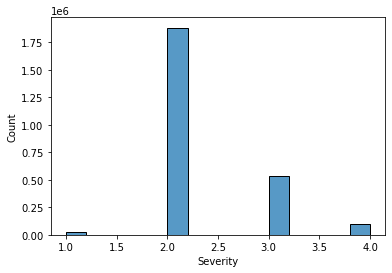

In [13]:
#histogram for Temp
sns.histplot(traffic['Severity'], bins = 15)

In [14]:
#find min, mean, and max values for severity
sev_min = traffic['Severity'].min()
sev_mean = traffic['Severity'].mean()
sev_max = traffic['Severity'].max()

print('Sev_min',sev_min)
print('Sev_mean',sev_mean)
print('Sev_max',sev_max)

Sev_min 1
Sev_mean 2.276311366717997
Sev_max 4


<AxesSubplot:xlabel='Temperature(F)', ylabel='Count'>

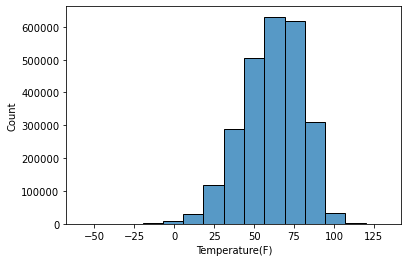

In [15]:
#histogram for Temp
sns.histplot(traffic['Temperature(F)'], bins = 15)

In [16]:
#find min, mean, and max values for temp
temp_min = traffic['Temperature(F)'].min()
temp_mean = traffic['Temperature(F)'].mean()
temp_max = traffic['Temperature(F)'].max()

print('temp_min',temp_min)
print('temp_mean',temp_mean)
print('temp_max',temp_max)

temp_min -58.0
temp_mean 61.3918093709736
temp_max 132.6


<AxesSubplot:xlabel='Visibility(mi)', ylabel='Count'>

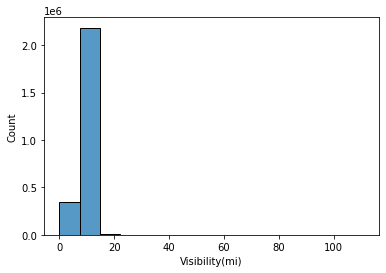

In [17]:
#histogram for Severity
sns.histplot(traffic['Visibility(mi)'], bins = 15)

In [18]:
#find min, mean, and max values for visibility
Vis_min = traffic['Visibility(mi)'].min()
Vis_mean = traffic['Visibility(mi)'].mean()
Vis_max = traffic['Visibility(mi)'].max()

print('Vis_min',Vis_min)
print('Vis_mean',Vis_mean)
print('Vis_max',Vis_max)

Vis_min 0.0
Vis_mean 9.191096493521739
Vis_max 111.0


While it looks like there are extreme values for visibility. My research has been unable to specify which of the definitions for visibility are being used in this data and what an appropriate maximum should be.

In [19]:
#convert Start_Time into a new float column start_time_float that displays time as a number
traffic['Start_Time'] = pd.to_datetime(traffic['Start_Time'])
traffic['start_time_float'] = traffic['Start_Time'].dt.hour + traffic['Start_Time'].dt.minute/60 + traffic['Start_Time'].dt.second/3600

In [20]:
#check that time values are correct
traffic.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,start_date,start_time,time_of_day,acdnt_per_day,state,avg_state_sev,avg_state_temp,avg_state_rain,avg_state_acdnt_per_day,start_time_float
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,29607-6027,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-05-21,08:29:55,Morning,1693,South Carolina,2.172651,64.663102,0.006040,64.104680,8.498611
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,28270-8560,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-10-07,17:43:09,Evening,2450,North Carolina,2.147315,63.247137,0.006803,67.104506,17.719167
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,95033,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,2020-12-13,21:53:00,Night,5467,California,2.182810,64.206544,0.003010,361.961450,21.883333
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,89705,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,16.0,30.16,10.0,SSW,4.6,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,2018-04-17,16:51:23,Evening,1626,Nevada,2.346195,62.241654,0.001130,4.816372,16.856389
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,33324,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,84.0,29.92,10.0,SSE,13.8,0.0,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,2016-08-31,17:40:49,Evening,1250,Florida,2.238960,74.721026,0.008045,147.670296,17.680278


<AxesSubplot:xlabel='start_time_float', ylabel='Count'>

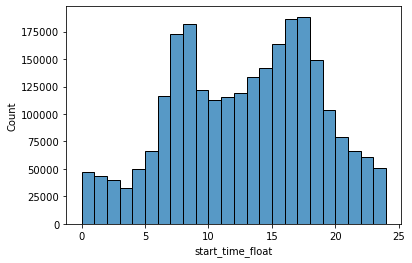

In [21]:
#histogram for start_time
sns.histplot(traffic['start_time_float'], bins = 24)

In [22]:
#find min, mean, and max values for start_time
time_min = traffic['start_time_float'].min()
time_mean = traffic['start_time_float'].mean()
time_max = traffic['start_time_float'].max()

print('time_min',time_min)
print('time_mean',time_mean)
print('time_max',time_max)

time_min 0.0
time_mean 12.902742825558141
time_max 23.999722222222225


### 3
Data prep for regression analysis

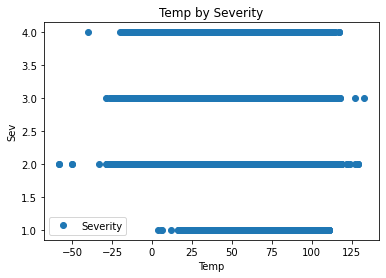

In [23]:
#create scatter plot of temp and severity variables to recheck correlation
traffic.plot(x = 'Temperature(F)', y = 'Severity', style = 'o')
plt.title('Temp by Severity')
plt.ylabel('Sev')
plt.xlabel('Temp')
plt.show()
#unclear on density but low sev accidents do have higher temp

In [24]:
#reshape X and y variables into NumPy arrays
X2=traffic['Temperature(F)'].values.reshape(-1,1)
y2=traffic['Severity'].values.reshape(-1,1)

In [25]:
#split data into 70% training and 30% test data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3, random_state = 0)

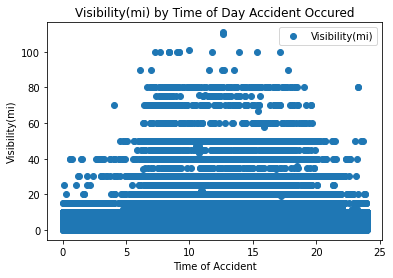

In [26]:
#create scatter plot of start_time_float and Visibility(mi) variables to recheck correlation
traffic.plot(x = 'start_time_float', y = 'Visibility(mi)', style = 'o')
plt.title('Visibility(mi) by Time of Day Accident Occured')
plt.ylabel('Visibility(mi)')
plt.xlabel('Time of Accident')
plt.show()
#unclear correlation but highest visbility does look to occur in middle of day

In [27]:
#reshape X and y variables into NumPy arrays
X=traffic['start_time_float'].values.reshape(-1,1)
y=traffic['Visibility(mi)'].values.reshape(-1,1)

In [28]:
#split data into 70% training and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

### 4
Regression hypothesis
For Temp and Severity:
I expect there to be a negative correlation with severity and temperature. As temperature rises out of freezing/snowy levels then crashes will be less severe.

Null Hypothesis = The increase in Temperature will have no effect on the Severity of accidents.

Alternative Hypothesis = The increase in temperature will be inversely proportional to the increase in severity. The majority of severity 4 accidents will occur below the Temp mean of 61.1 and the majority of Severity 1 accidents will occur above the Temp mean.

For visibility and time of day:
I expect there to be a positive correlation between visibility and the time of day. While visbility appears to peak at mid day the density of dots is not clear and I suspect more values later in the day with higher visibility.

Null Hypothesis = The increase in the hour of the day will have no effect on the visibility distance.

Alternative Hypothesis = Visbility distance will increase linearly as the hour of the day increases from below the visbility average of 9.2 before noon to above 9.2 after noon.

### 5
Regression analysis (vis and time)

In [29]:
#create regression object
regression = LinearRegression()

In [30]:
#fit training data to regression object
regression.fit(X_train, y_train)

LinearRegression()

In [31]:
#predict values of y (Severity) based on the x_test data fit into the model
y_predicted_by_model = regression.predict(X_test)

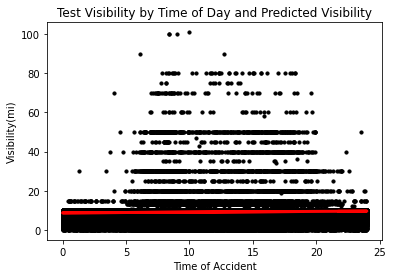

In [32]:
#plot the scatter of X and y test values with the line of X test and y predicted
plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 10)
plot_test.plot(X_test, y_predicted_by_model, color='red', linewidth =3)
plt.title('Test Visibility by Time of Day and Predicted Visibility')
plt.ylabel('Visibility(mi)')
plt.xlabel('Time of Accident')
plt.show()

In [33]:
#find the summary statistics for the model
slope = regression.coef_
mse = mean_squared_error(y_test, y_predicted_by_model)
r2 = r2_score(y_test, y_predicted_by_model)

In [34]:
#print summary stats
print('slope/coefficient', slope)
print('mean squared error', mse)
print('r squared', r2)

slope/coefficient [[0.03712787]]
mean squared error 7.324297359586046
r squared 0.006003079509881326


In [35]:
#create dataframe that compares the y_test and the y_predicted values
y_compare = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_predicted_by_model.flatten()})
y_compare.head(20)

,Actual,Predicted
0,10.00,9.413687
1,10.00,9.137559
2,10.00,9.442008
3,3.00,9.308956
4,10.00,8.982860
5,1.50,9.032209
6,10.00,9.259999
7,0.25,8.891432
8,10.00,9.042883
9,10.00,8.930004


In [36]:
ypredict_min = y_predicted_by_model.max()
ypredict_max = y_predicted_by_model.min()

print('ypredict_min', ypredict_min)
print('ypredict_max', ypredict_max)

ypredict_min 9.60224540591572
ypredict_max 8.711207361542298


The slope indicates that visibility increases a very very small amount as the day goes. 

For the range of values in visibilty (0-140) indicates that the  mean squared error is fairly low. However the denisty of data with low visibility values and a slope of near 0 may have just forced the model to effectively predict that visbility will always be 8.7 - 9.6 miles.

The r squared value indicates the relationship between time of day and visibility is near 0 and the line is a poor fit. This falls pretty close in line with the null hypothesis that there is no relationship. I suspect a different type of regression( like a curve)could better model what appears to be an increase in visibility in the middle of the day.

I dont believe there is any reason for concern of bias in the model. But with a linear model the prediction will consistently be that vsibility will be more than adequate for safety on average.

Regression analysis (temp and sev)

In [37]:
#create regression object
regression2 = LinearRegression()

In [38]:
#fit training data to regression object
regression2.fit(X2_train, y2_train)

LinearRegression()

In [39]:
#predict values of y (Severity) based on the x_test data fit into the model
y2_predicted_by_model = regression2.predict(X2_test)

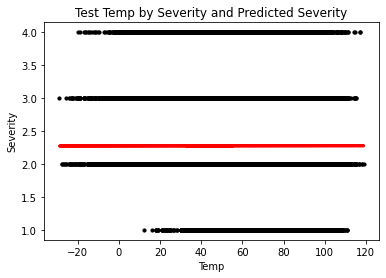

In [40]:
#plot the scatter of X and y test values with the line of X test and y predicted
plot_test = plt
plot_test.scatter(X2_test, y2_test, color='black', s = 10)
plot_test.plot(X2_test, y2_predicted_by_model, color='red', linewidth =3)
plt.title('Test Temp by Severity and Predicted Severity')
plt.ylabel('Severity')
plt.xlabel('Temp')
plt.show()

In [41]:
#find the summary statistics for the model
slope2 = regression.coef_
mse2 = mean_squared_error(y2_test, y2_predicted_by_model)
r22 = r2_score(y2_test, y2_predicted_by_model)

In [42]:
#print summary stats
print('slope/coefficient', slope2)
print('mean squared error', mse2)
print('r squared', r22)

slope/coefficient [[0.03712787]]
mean squared error 0.30014820323768515
r squared 3.3307370546076243e-06


In [43]:
#create dataframe that compares the y_test and the y_predicted values
y_compare2 = pd.DataFrame({'Actual':y2_test.flatten(),'Predicted':y2_predicted_by_model.flatten()})
y_compare2.head(20)

,Actual,Predicted
0,2,2.275416
1,2,2.276406
2,2,2.275523
3,3,2.275355
4,4,2.275303
5,2,2.275937
6,2,2.276646
7,2,2.275386
8,2,2.276103
9,2,2.276348


In [44]:
ypredict_min2 = y2_predicted_by_model.max()
ypredict_max2 = y2_predicted_by_model.min()

print('ypredict_min2', ypredict_min2)
print('ypredict_max2', ypredict_max2)

ypredict_min2 2.2777857704329607
ypredict_max2 2.2737026436515038


The slope/coefficient [[0.03738762]] of nearly 0 indicates there is little to no change to Severity in relation to Temperature. In fact it very slightly increases as temp does.

mean squared error 0.3062182690852363 is acutally somewhat large in this range of 1-4. This does make sense as the mean of severity is 2.2 and 2 values occur the most. The model would be expected to say your expected to get 2.2 and any error will just be a refelction of how likely something other than a 2 is. 

r squared 4.072818624134555e-06 is effectively 0. Just a very poor fit.

### 6
Export data

In [45]:
#export data
traffic.to_csv(os.path.join(path, 'Prepared', 'v4_data_post_lin_regression.csv'))